# Spam Classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# define column names
names = ['word_freq_WORD ', 'char_freq_CHAR', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_tota','spam']

<font color=#6495ED > 48 continuous real [0,100] attributes of type word_freq_WORD = percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail 

1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters 

1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters 

1 continuous integer [1,...] attribute of type capital_run_length_total 
= sum of length of uninterrupted sequences of capital letters 
= total number of capital letters in the e-mail 

1 nominal {0,1} class attribute of type spam 
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 

In [3]:
# import the dataset
df = pd.read_csv('spambase.data', header=None,names=names)
df.head()


word_freq_WORD   \
0.00 0.64 0.64 0.0 0.32 0.00 0.00 0.00 0.00 0.00 0.00 0.64 0.00 0.00 0.00 0.32 0.00 1.29 1.93 0.00 0.96 0.0 0.00 0.00 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.00 0.00 0.0 0.0 0.00 0.000 0.0 0.778            0.000   
0.21 0.28 0.50 0.0 0.14 0.28 0.21 0.07 0.00 0.94 0.21 0.79 0.65 0.21 0.14 0.14 0.07 0.28 3.47 0.00 1.59 0.0 0.43 0.43 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.07 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.00 0.00 0.0 0.0 0.00 0.132 0.0 0.372            0.180   
0.06 0.00 0.71 0.0 1.23 0.19 0.19 0.12 0.64 0.25 0.38 0.45 0.12 0.00 1.75 0.06 0.06 1.03 1.36 0.32 0.51 0.0 1.16 0.06 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00 0.0 0.0 0.06 0.0 0.0 0.12 0.0 0.06 0.06 0.0 0.0 0.01 0.143 0.0 0.276            0.184   
0.00 0.00 0.00 0.0 0.63 0.00 0.31 0.63 0.31 0.63 0.31 0.31 0.31 0.00 0.00 0.31 0.00 0.00 3.18 0.00 0.31 0.0 0.00 0.00 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.00 0.00 0.0 0.0 0.00 0.137 0.0 0.137            0.000   
                                                                                                                                                                                                                                0.135 0.0 0.135            0.000   

                                                                                                                                                                                                                                                 char_freq_CHAR  \
0.00 0.64 0.64 0.0 0.32 0.00 0.00 0.00 0.00 0.00 0.00 0.64 0.00 0.00 0.00 0.32 0.00 1.29 1.93 0.00 0.96 0.0 0.00 0.00 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.00 0.00 0.0 0.0 0.00 0.000 0.0 0.778           0.000   
0.21 0.28 0.50 0.0 0.14 0.28 0.21 0.07 0.00 0.94 0.21 0.79 0.65 0.21 0.14 0.14 0.07 0.28 3.47 0.00 1.59 0.0 0.43 0.43 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.07 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.00 0.00 0.0 0.0 0.00 0.132 0.0 0.372           0.048   
0.06 0.00 0.71 0.0 1.23 0.19 0.19 0.12 0.64 0.25 0.38 0.45 0.12 0.00 1.75 0.06 0.06 1.03 1.36 0.32 0.51 0.0 1.16 0.06 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00 0.0 0.0 0.06 0.0 0.0 0.12 0.0 0.06 0.06 0.0 0.0 0.01 0.143 0.0 0.276           0.010   
0.00 0.00 0.00 0.0 0.63 0.00 0.31 0.63 0.31 0.63 0.31 0.31 0.31 0.00 0.00 0.31 0.00 0.00 3.18 0.00 0.31 0.0 0.00 0.00 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.00 0.00 0.0 0.0 0.00 0.137 0.0 0.137           0.000   
                                                                                                                                                                                                                                0.135 0.0 0.135           0.000   

                                                                                                                                                                                                                                                 capital_run_length_average  \
0.00 0.64 0.64 0.0 0.32 0.00 0.00 0.00 0.00 0.00 0.00 0.64 0.00 0.00 0.00 0.32 0.00 1.29 1.93 0.00 0.96 0.0 0.00 0.00 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.00 0.00 0.0 0.0 0.00 0.000 0.0 0.778                       3.756   
0.21 0.28 0.50 0.0 0.14 0.28 0.21 0.07 0.00 0.94 0.21 0.79 0.65 0.21 0.14 0.14 0.07 0.28 3.47 0.00 1.59 0.0 0.43 0.43 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.07 0.0 0.0 0.00 0.0 0.0 0.00 0.0 0.00 0.00 0.0 0.0 0.00 0.132 0.0 0.372                       5.114   
0.06 0.00 0.71 0.0 1.23 0.19 0.19 0.12 0.64 0.25 0.38 0.45 0.12 0.00 1.75 0.06 0.06 1.03 1.36 0.32 0.51 0.0 1.16 0.06 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00 0.0 0.0 0.06 0.0 0.0 0.12 0.0 0.06 0.06 0.0 0.0 0.01 0.143 0.0 0.276                       9.821   
0.00 0.00 0.00 0.0 0.63 0.00 0.31 0.63 0.

# Split and Train the Data

In [4]:
#split the dataset
scaler = StandardScaler()
scaler.fit(df.drop('spam', axis=1))

scaled_features = scaler.transform(df.drop('spam', axis=1))

df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])
df_feat.head()

,word_freq_WORD,char_freq_CHAR,capital_run_length_average,capital_run_length_longest,capital_run_length_tota
0,-0.308355,-0.103048,-0.045247,0.045298,-0.008724
1,0.423783,0.008763,-0.002443,0.250563,1.228324
2,0.440053,-0.079754,0.145921,2.221106,3.258733
3,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222
4,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222


In [5]:
# train the dataset
X = df_feat
y = df['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
accuracy = knn.score(X_train,y_train)
print(accuracy)

0.8684782608695653


# Preditction

In [6]:
# do the prediction
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[502  59]
 [ 95 265]]


              precision    recall  f1-score   support

           0       0.84      0.89      0.87       561
           1       0.82      0.74      0.77       360

   micro avg       0.83      0.83      0.83       921
   macro avg       0.83      0.82      0.82       921
weighted avg       0.83      0.83      0.83       921



In [7]:
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

   micro avg       0.60      0.60      0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



<font color=#6495ED>
    
**Precision: How many selected items are relevant?**

**Recall: How many relevant items are selected?**

**F1: The Harmonic Mean of precision and recall.**
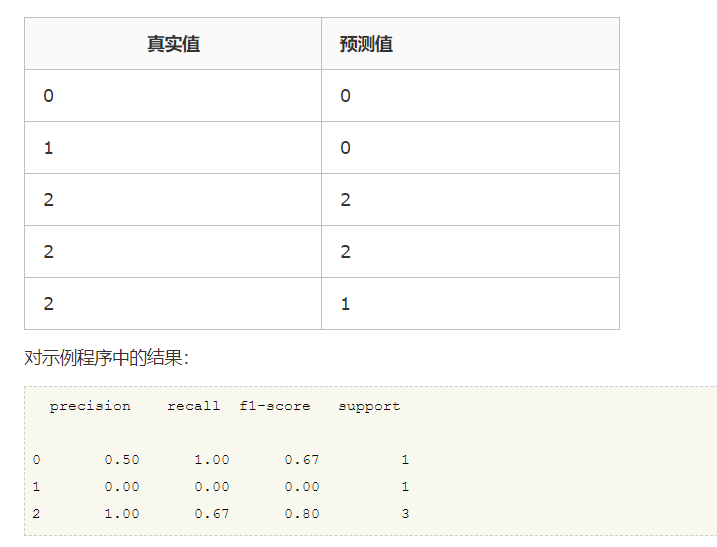

In [8]:
example1 = np.array([0.000,0.000,3.756,61,278])
example1 = example1.reshape(1,-1)
prediction = knn.predict(example1)
print(prediction)

[1]


# How to choose an appropriate K value?

In [9]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

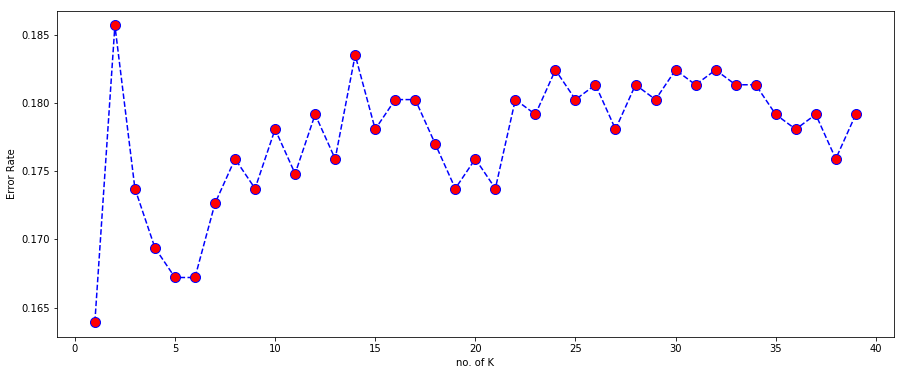

In [10]:
plt.figure(figsize=(15,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
plt.xlabel('no. of K')
plt.ylabel('Error Rate')

In [12]:
knn = KNeighborsClassifier(8)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[517  44]
 [118 242]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       561
           1       0.85      0.67      0.75       360

   micro avg       0.82      0.82      0.82       921
   macro avg       0.83      0.80      0.81       921
weighted avg       0.83      0.82      0.82       921

